In [1]:
import pandas as pd 
import numpy as np
import os
import math
import matplotlib.pyplot as plt

import os

plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

In [2]:
dir= "/home/lsy/Project/extract/fig"
def plot_line(a, data,COLOR,LINESTYLE,MAKER,LABEL):
    plt.plot(a,data,color=COLOR,linestyle=LINESTYLE, 
             markersize=15, 
             markeredgewidth =1.5,
             markerfacecolor='none',
             marker=MAKER,label = LABEL)

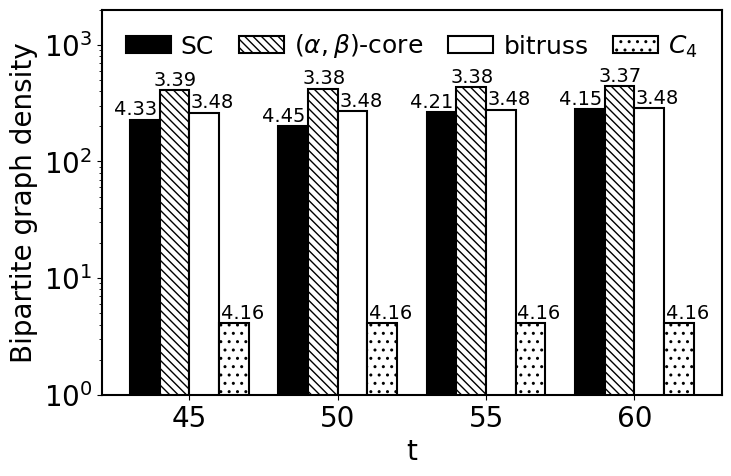

In [8]:
import numpy as np
# fig = plt.figure(1, figsize=(6.8*2, 4.0))
# ax = fig.add_subplot(111)
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.3

data = [10,15, 20, 25]
labels = [ "45", "50", "55","60"]
x =list(range(len(labels)))
total_width, n = 0.4,2
width = total_width / n

weighted_density = [228.8772255,201.0200863,262.9089933,280.0634708]
weight_rating = [4.331128,4.45061825,4.20970025,4.149943]
abcore_density = [409.283535,420.870374,431.687559,440.572795]
abcore_rating = [3.392919,3.383857,3.37509,3.366231]
G5_density = [4.119263,4.119263,4.119263,4.119263]
G5_rating = [4.15694,4.15694,4.15694,4.15694]
truss_density = [261.140222,270.158941,278.150888,285.78591]
bitruss_rating = [3.475264,3.475675,3.476124,3.476569]
# plt.bar(x, peel_list, width=width, label="peel",linewidth=1,edgecolor='black',
#         fc = 'black')
bar1 = plt.bar([i - 0.30 for i in x],weighted_density, width = width,label = "SC", linewidth=1.5 , fc = 'black',edgecolor="black")

bar2 = plt.bar([i - 0.10 for i in x],abcore_density , width = width,label =r"$(\alpha,\beta)$-core"  , linewidth=1.5,
               color="w" ,edgecolor="black",hatch="\\\\"*2) 
bar3 = plt.bar([i + 0.10 for i in x],truss_density , width = width,label = "bitruss" , linewidth=1.5,
               color="w" ,edgecolor="black")

bar4 = plt.bar([i + 0.30 for i in x],G5_density , width = width, label = r"$C_{4}$" , linewidth=1.5,
               color="w" ,edgecolor="black",hatch="..")

i=0
for rect in bar1:
    height = rect.get_height()
#     plt.text(rect.get_x()-rect.get_width()/5-0.16, 1.1*height, '%.2f' % weight_rating[i],fontsize=14)
    plt.text(rect.get_x()-rect.get_width()/5-0.07, 1.1*height, '%.2f' % weight_rating[i],fontsize=14)
    i+= 1
    
i=0
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x()-rect.get_width()/5, 1.1*height, '%.2f' % abcore_rating[i],fontsize=14)
    i+= 1
i=0
for rect in bar3:
    height = rect.get_height()
    plt.text(rect.get_x()-rect.get_width()/5+0.05, 1.1*height, '%.2f' % bitruss_rating[i],fontsize=14)
    i+= 1
i=0
for rect in bar4:
    height = rect.get_height()
    plt.text(rect.get_x()-rect.get_width()/5+0.05, 1.08*height, '%.2f' % G5_rating[i],fontsize=14)
    i+= 1

# my_y_ticks = np.arange(0, 601, 100)
# plt.yticks(my_y_ticks)
plt.yscale('log')
plt.ylim(1,2*pow(10,3))
plt.xticks( fontsize=20) #rotation=-15,
plt.yticks(fontsize=20)
plt.ylabel('Bipartite graph density',fontsize=20)
plt.xlabel('t',fontsize=20)
plt.legend(fontsize=18 ,ncol=4,loc="upper center", handlelength = 1.8, handletextpad = 0.4, labelspacing = 0, columnspacing=1) 
plt.xticks(x,labels)
ax.tick_params(axis="x",direction="in", left="off",labelleft="on")
plt.savefig(dir+"avg_score.pdf", bbox_inches = 'tight')

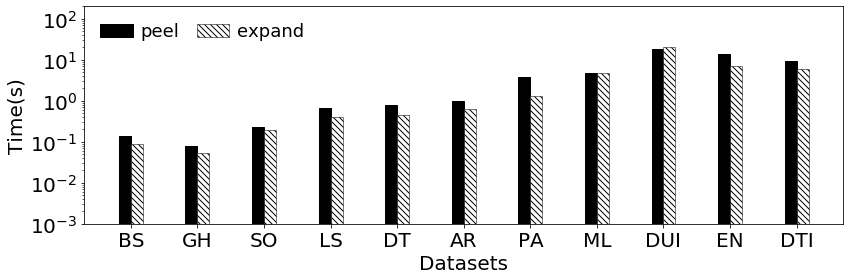

In [4]:
# query performence
# default query barplot 
import numpy as np
fig = plt.figure(1, figsize=(6.8*2, 4.0))
ax = fig.add_subplot(111)
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.3
# 0.7
# default=[
# ['BS',0.029819,0.051474],
# ['GH',0.026776,0.039266],
# ['SO',0.039862,0.06904],
# ['LS',0.353383,0.241707],
# ['DT',0.095762,0.18853],
# ['AR',0.144527,0.351827],
# ['PA',0.012013,0.17036],
# ['ML',2.35578,2.7036],
# ['DUI',7.902685,10.010397],
# ['EN',1.872024,2.798319],
# ['DTI',1.101762,2.186652],
# ]
default=[
['BS',0.13498,0.0861],
['GH',0.079098,0.052056],
['SO',0.233532,0.195663],
['LS',0.67481,0.408521],
['DT',0.795501,0.456255],
['AR',1.003714,0.62751],
['PA',3.725007,1.310021],
['ML',4.815597,4.625074],
['DUI',18.530698,20.253232],
['EN',13.986873,6.890248],
['DTI',9.218351,5.897713]
]
default_df=pd.DataFrame(default)
name_list = default_df[0].tolist()
peel_list= default_df[1].tolist()
expand_list= default_df[2].tolist()

x = np.arange(len(name_list))
# x =list(range(len(our_list)))
total_width, n = 0.9, 4
width = total_width / (n+1)

for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, peel_list, width=width, label="peel",linewidth=1,edgecolor='black',
        fc = 'black')

for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x+width, expand_list, width=width, label="expand",linewidth=0.5,edgecolor='black',hatch="\\\\"*2,
        fc = 'w')

plt.xticks(x+0.5*width,name_list)

plt.yscale('log')
plt.yscale('log')
plt.ylim(0.001,2*pow(10,2))
plt.ylabel("Time(s)",fontsize = 20)
# plt.yticks(pos, labels)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Datasets",fontsize=20)

# ax.set_xticks(x+1.5*width)

# plt.legend(fontsize=18,ncol=3,loc= "upper left",bbox_to_anchor=(0, 0.75,0.5,0.5)) 
# plt.legend(fontsize=17,ncol=4,loc="upper left") 
plt.legend(fontsize=18 ,ncol=2,loc="upper left", handlelength = 1.8, handletextpad = 0.4, labelspacing = 0, columnspacing=1) 
plt.savefig(dir+"query_performance_time.pdf", bbox_inches='tight')
plt.show()


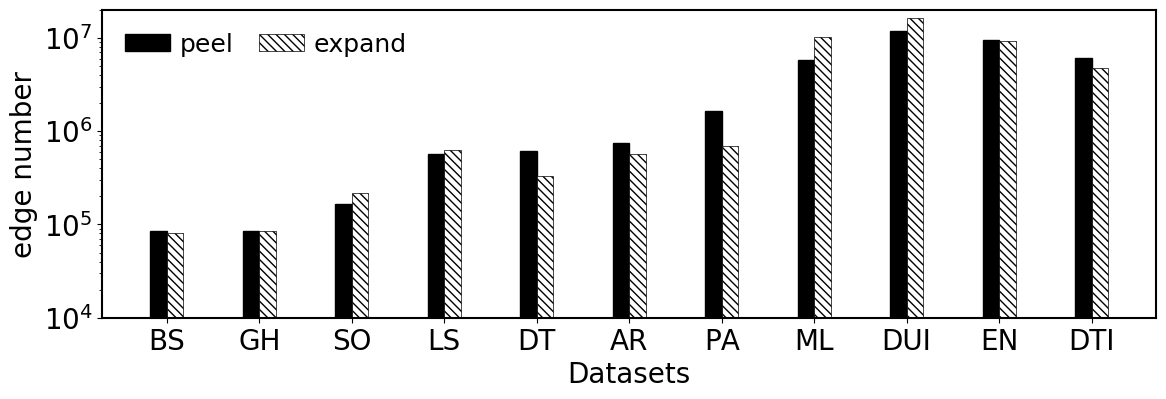

In [43]:
# query performence edge
# default query barplot 
import numpy as np
fig = plt.figure(1, figsize=(6.8*2, 4.0))
ax = fig.add_subplot(111)
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.3

# default=[
# ['BS',31578,43760.7],
# ['GH',39561.4,68710],
# ['SO',30828.8,78849.2],
# ['LS',322847.2,286253.9],
# ['DT',101746.1,130009.2],
# ['AR',145589.6,228536],
# ['PA',296.7,520.2],
# ['ML',1286383.3,7498134],
# ['DUI',6462453.3,9710138],
# ['EN',2362915.5,4461207.3],
# ['DTI',835822.4,2002772.6]
# ]
default=[
['BS',84769.86,81027.54],
['GH',85601.58,84730.64],
['SO',164889.96,214813.68],
['LS',561680.54,631655.16],
['DT',619403.44,333739.34],
['AR',738739.44,561697.28],
['PA',1633926.46,697183.84],
['ML',5766881.36,10197887.44],
['DUI',11858569.7,16467284.66],
['EN',9451308.14,9193738.74],
['DTI',6119159.66,4722251.1]
]

default_df=pd.DataFrame(default)
name_list = default_df[0].tolist()
peel_list= default_df[1].tolist()
expand_list= default_df[2].tolist()

x = np.arange(len(name_list))
# x =list(range(len(our_list)))
total_width, n = 0.9, 4
width = total_width / (n+1)

for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, peel_list, width=width, label="peel",linewidth=1,edgecolor='black',
        fc = 'black')

for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x+width, expand_list, width=width, label="expand",linewidth=0.5,edgecolor='black',hatch="\\\\"*2,
        fc = 'w')

plt.xticks(x+0.5*width,name_list)

plt.yscale('log')
plt.yscale('log')
plt.ylim(10000,2*pow(10,7))
plt.ylabel("edge number",fontsize = 20)
# plt.yticks(pos, labels)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Datasets",fontsize=20)

# ax.set_xticks(x+1.5*width)

# plt.legend(fontsize=18,ncol=3,loc= "upper left",bbox_to_anchor=(0, 0.75,0.5,0.5)) 
# plt.legend(fontsize=17,ncol=4,loc="upper left") 
plt.legend(fontsize=18 ,ncol=2,loc="upper left", handlelength = 1.8, handletextpad = 0.4, labelspacing = 0, columnspacing=1) 
plt.savefig(dir+"query_performance_edge.pdf", bbox_inches='tight')
plt.show()


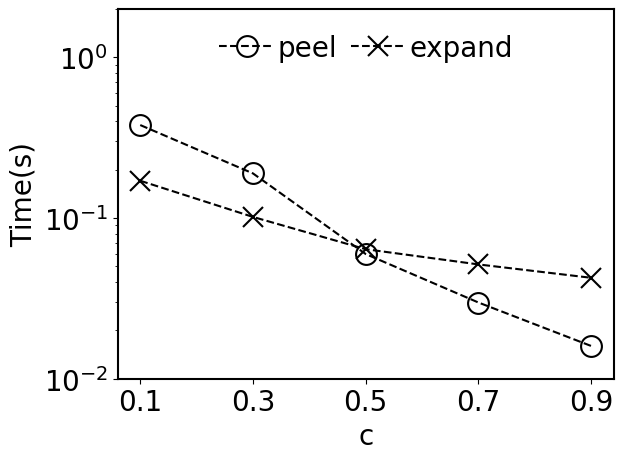

In [8]:
#vary ab time
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
#book
peel = [0.379586,0.189762,0.05974,0.029819,0.015993]
expand = [0.170803,0.101698,0.064029,0.051474,0.042497]
#dblp
# peel = [14.491147,4.015658,0.094422,0.012013,0.011792]
# expand = [2.35556,3.51081,0.359245,0.17036,0.154132]

# lastfm_peeling =[1.746858,0.681622,0.432183,0.353383,0.160004]
# lastfm_expand =[0.673786,0.451003,0.369469,0.241707,0.306642]
# stackoverflow_peeling =[0.742545,0.260727,0.109111,0.039862,0.015417]
# stackoverflow_expand = [0.431054,0.277953,0.156135,0.06904,0.044134]
# delicious-ti
# peel=[35.826102,6.037599,2.595119,1.101762,0.531172]
# expand=[13.718554,7.921023,4.335933,2.186652,1.326405]


# amazon
# peel=[3.721037,0.812498,0.287334,0.144527,0.053175]
# expand=[1.229301,0.899663,0.456371,0.351827,0.200388]


index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
plot_line(index_x,peel,'black','dashed', "o", "peel")
plot_line(index_x,expand,'black','dashed', "x", "expand")

font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(0.01,2*pow(10,0))
plt.ylabel("Time(s)",fontsize = 20)
plt.xlabel('c',fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper center',ncol=2, frameon=False, prop = font2) #去掉图例边框
# plt.show()
plt.savefig(dir+"vary_ab_time_ar.pdf", bbox_inches='tight')

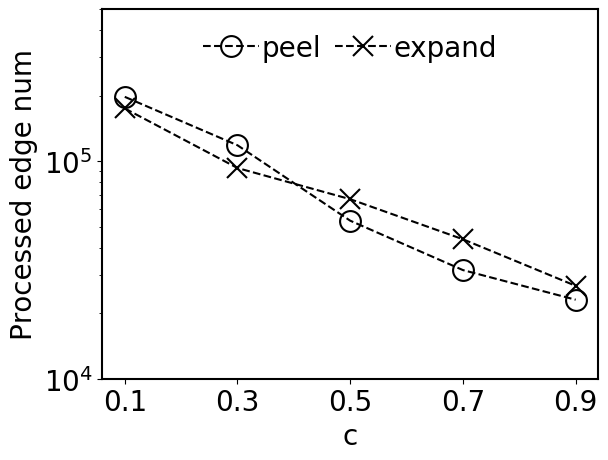

In [9]:
#vary ab edge
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5

# bs
peel = [197591.3,118341.8,53265.2,31578,23073]
expand = [174761.3,93009.8,66870.8,43760.7,26735.1]
#lastfm
# peel =[1238760,600747,441960.7,322847.2,204087.8]
# expand = [1160038.1,842244.1,586627,286253.9,283112.7]
#so
# peeling = [469906.4,212056.8,95948,30828.8,15709.8]
# expand = [490742.2,302165.3,166989.8,78849.2,35321.9]
#dti
# peel=[23479497.9,3538799.4,2262865.2,835822.4,478813.4]
# expand=[8933097.3,8281877.8,3590336.7,2002772.6,803171.1]

#amazon
# peel=[2617983.8,656672.2,222805.8,145589.6,50645.8]
# expand=[1160844.6,909810.7,411221.1,228536,98074]


plot_line(index_x,peel,'black','dashed', "o", "peel")
plot_line(index_x,expand,'black','dashed', "x", "expand")


index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(10000,5*pow(10,5))
plt.ylabel("Processed edge num",fontsize = 20)
plt.xlabel('c',fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper center',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir+"vary_ab_edge_ar.pdf", bbox_inches='tight')

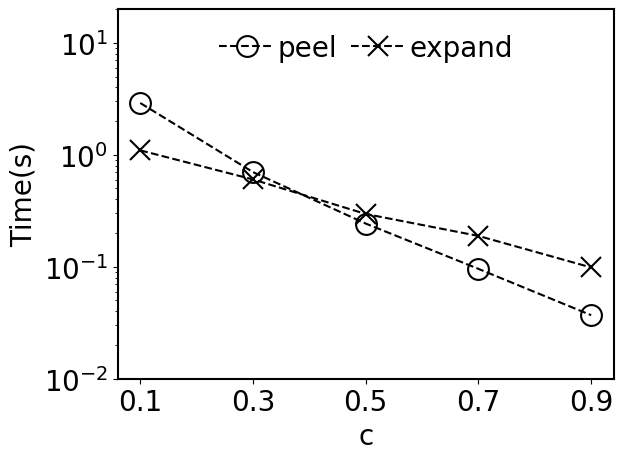

In [88]:
#vary ab time
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5

# book_peeling = [0.379586,0.189762,0.05974,0.029819,0.015993]
# book_expand = [0.170803,0.101698,0.064029,0.051474,0.042497]

# dblp_peeling = [14.491147,4.015658,0.094422,0.012013,0.011792]
# dblp_expand = [2.35556,3.51081,0.359245,0.17036,0.154132]

# lastfm_peeling =[1.746858,0.681622,0.432183,0.353383,0.160004]
# lastfm_expand =[0.673786,0.451003,0.369469,0.241707,0.306642]
# stackoverflow_peeling =[0.742545,0.260727,0.109111,0.039862,0.015417]
# stackoverflow_expand = [0.431054,0.277953,0.156135,0.06904,0.044134]
# delicious-ti
# peel=[35.826102,6.037599,2.595119,1.101762,0.531172]
# expand=[13.718554,7.921023,4.335933,2.186652,1.326405]
#wiki
# peel=[56.911174,6.365756,3.966251,1.872024,0.819161]
# expand=[16.297273,7.883415,5.632911,2.798319,1.839321]

#dt
peel=[2.901114,0.700534,0.24315,0.095762,0.036947]
expand=[1.095708,0.602304,0.296144,0.18853,0.098588]

index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
plot_line(index_x,peel,'black','dashed', "o", "peel")
plot_line(index_x,expand,'black','dashed', "x", "expand")

font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(0.01,2*pow(10,1))
plt.ylabel("Time(s)",fontsize = 20)
plt.xlabel('c',fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper center',ncol=2, frameon=False, prop = font2) #去掉图例边框
# plt.show()
plt.savefig(dir+"vary_ab_time_dt.pdf", bbox_inches='tight')

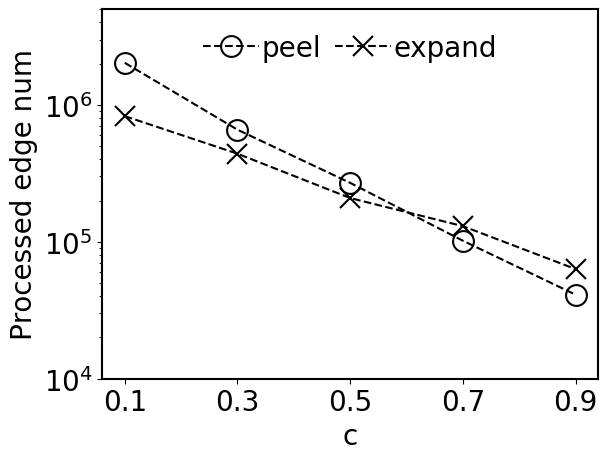

In [89]:
#vary ab edge
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5

# bs
# peeling = [197591.3,118341.8,53265.2,31578,23073]
# expand = [174761.3,93009.8,66870.8,43760.7,26735.1]
# lastfm_peeling =[1238760,600747,441960.7,322847.2,204087.8]
# lastfm_expand = [1160038.1,842244.1,586627,286253.9,283112.7]
#so
# peeling = [469906.4,212056.8,95948,30828.8,15709.8]
# expand = [490742.2,302165.3,166989.8,78849.2,35321.9]
#dti
# peel=[23479497.9,3538799.4,2262865.2,835822.4,478813.4]
# expand=[8933097.3,8281877.8,3590336.7,2002772.6,803171.1]
# # wiki
# peel = [33110470.3,5001149.7,5790674.6,2362915.5,991330.6]
# expand=[17556867.9,15129301.7,6288982.3,4461207.3,2532334.5]
# dt
peel=[2026833.3,658118.8,269251.3,101746.1,41067.7]
expand=[827330.5,439642.9,208556.1,130009.2,63158]
plot_line(index_x,peel,'black','dashed', "o", "peel")
plot_line(index_x,expand,'black','dashed', "x", "expand")


index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(10000,5*pow(10,6))
plt.ylabel("Processed edge num",fontsize = 20)
plt.xlabel('c',fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper center',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir+"vary_ab_edge_dt.pdf", bbox_inches='tight')

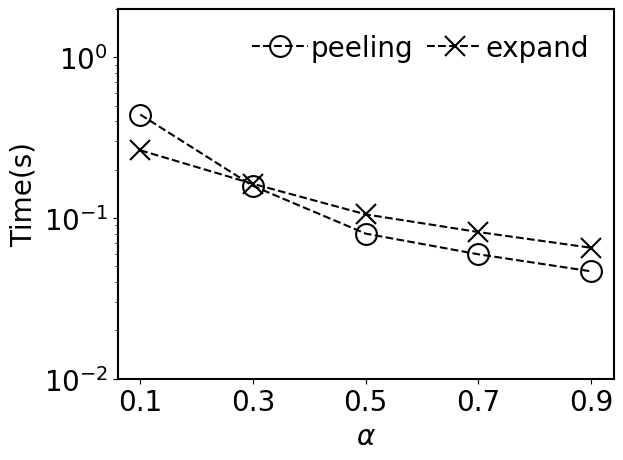

In [45]:
# vary a time
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
book_peeling = [0.087838,0.057174,0.03957,0.032292,0.025707]
book_expand = [0.056293,0.0526,0.045534,0.04311,0.03887]

stackoverflow_peeling =[0.441322,0.158574,0.080048,0.059511,0.046618]
stackoverflow_expand = [0.264402,0.163454,0.10548,0.081881,0.065344]

plot_line(index_x,stackoverflow_peeling,'black','dashed', "o", "peeling")
plot_line(index_x,stackoverflow_expand,'black','dashed', "x", "expand")

index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(0.01,2*pow(10,0))
plt.ylabel("Time(s)",fontsize = 20)
plt.xlabel(r"$\alpha$",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir+"vary_a_time.pdf", bbox_inches='tight')


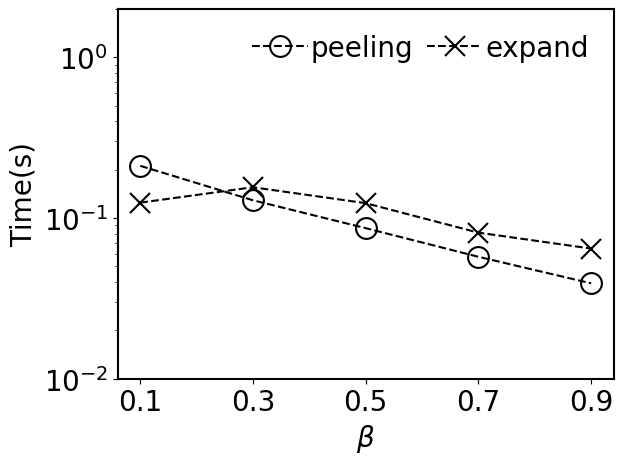

In [46]:
# vary b time
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5

book_peeling = [0.138767,0.075888,0.042985,0.027728,0.025182]
book_expand = [0.114663,0.071204,0.043801,0.038977,0.040547]
stackoverflow_peeling =[0.211593,0.129104,0.086562,0.057434,0.039254]
stackoverflow_expand = [0.124793,0.155602,0.123862,0.081152,0.06461]
plot_line(index_x,stackoverflow_peeling,'black','dashed', "o", "peeling")
plot_line(index_x,stackoverflow_expand,'black','dashed', "x", "expand")

index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}

plt.yscale('log')
plt.ylim(0.01,2*pow(10,0))
plt.ylabel("Time(s)",fontsize = 20)
plt.xlabel(r"$\beta$",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir+"vary_b_time.pdf", bbox_inches='tight')


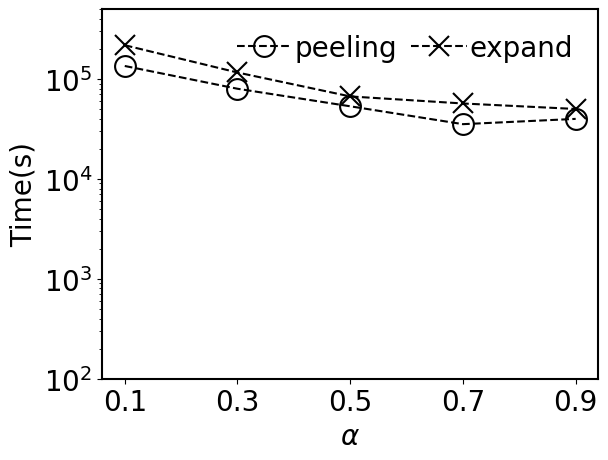

In [10]:
#vary a edge
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}

book_peeling = [134887.4,79804.7,53265.2,35285.8,39856.7]
book_expand = [217598.7,116063.3,66870.8,56828.9,50081.1]


stackoverflow_peeling =[511052.2,236689.9,92571.3,74803.4,58010.8]
stackoverflow_expand = [356276,208589.7,161437.2,110580,86341.7]

plot_line(index_x,book_peeling,'black','dashed', "o", "peeling")
plot_line(index_x,book_expand,'black','dashed', "x", "expand")
plt.yscale('log')

plt.ylim(100,5*pow(10,5))
plt.ylabel("Time(s)",fontsize = 20)
plt.xlabel(r"$\alpha$",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir+"vary_a_edge.pdf", bbox_inches='tight')

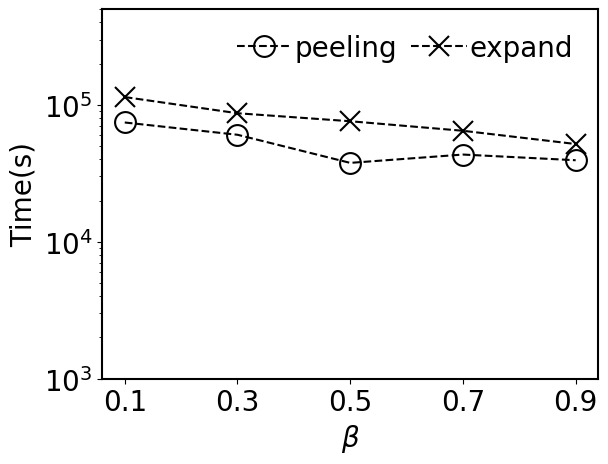

In [11]:
#vary b edge
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}

book_peeling = [74323.5,60463.7,37684.4,43346.6,39402.5]
book_expand = [113966.2,86826.8,75900.5,64651.8,51747.8]




stackoverflow_peeling =[222310.3,116921.1,95948,73697.9,49917.7]
stackoverflow_expand = [173826.2,229073.4,166989.8,115703.3,87201.2]

plot_line(index_x,book_peeling,'black','dashed', "o", "peeling")
plot_line(index_x,book_expand,'black','dashed', "x", "expand")
plt.yscale('log')

plt.ylim(1000,5*pow(10,5))
plt.ylabel("Time(s)",fontsize = 20)
plt.xlabel(r"$\beta$",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir+"vary_b_edge.pdf", bbox_inches='tight')

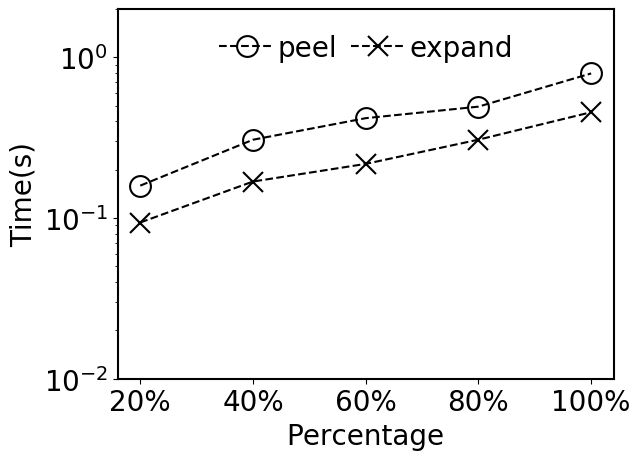

In [57]:
#query scalability time
# import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.0f'%(20*(temp+1)) + '%'

plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
# discogs_style
# peeling_time = [0.01981,0.043414,0.062125,0.069293,0.095762]
# expand_time = [0.033018,0.073122,0.10093,0.141402,0.18853]
#enwiki
# peeling_time = [1.306273,1.668828,1.548847,1.954517,1.872024]
# expand_time = [1.642616,2.135546,2.12774,2.782867,2.798319]

peeling_time = [0.159266,0.307497,0.418931,0.494221,0.795501]
expand_time = [0.093868,0.168889,0.217529,0.307755,0.456255]

plot_line(index_x,peeling_time,'black','dashed', "o", "peel")
plot_line(index_x,expand_time,'black','dashed', "x", "expand")
# plot_line(index_x,adv_time,'black','dashed', "s", "adv")
index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(0.01,2*pow(10,0))
plt.ylabel("Time(s)",fontsize = 20)
plt.xlabel("Percentage",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper center',ncol=2, frameon=False, prop = font2) 

plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))

plt.savefig(dir+"query_scalability_di_t.pdf", bbox_inches='tight')

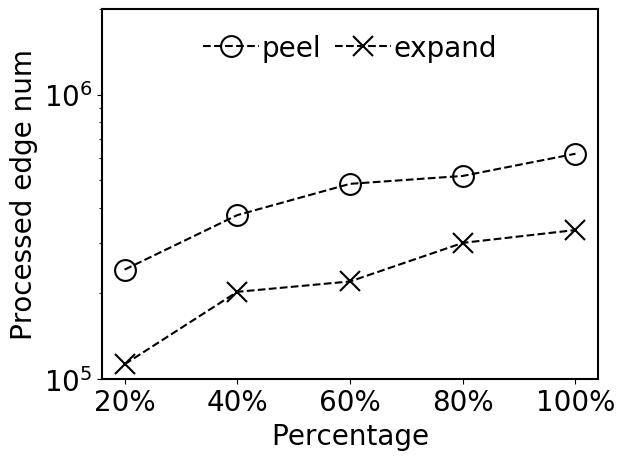

In [51]:
#query scalability edge
# import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.0f'%(20*(temp+1)) + '%'

plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
# discogs_style
# peeling_edge = [30335.7,65714.6,84414.1,110624.1,101746.1]
# expand_edge = [46463.7,83565.5,102385.2,108955.6,130009.2]
#enwiki
# peeling_edge = [2508782.1,2778308.6,2552948.1,3164921.4,2362915.5]
# expand_edge = [2743915.6,3195910.4,3637155.6,3873008.3,4461207.3]



peeling_edge = [242095.3,376658.36,485297.86,517449.04,619403.44]
expand_edge = [112381.36,202239.8,219980.48,300741.7,333739.34]

plot_line(index_x,peeling_edge,'black','dashed', "o", "peel")
plot_line(index_x,expand_edge,'black','dashed', "x", "expand")
# plot_line(index_x,adv_time,'black','dashed', "s", "adv")
index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(100000,2*pow(10,6))
plt.ylabel("Processed edge num",fontsize = 20)
plt.xlabel("Percentage",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper center',ncol=2, frameon=False, prop = font2) #去掉图例边框

plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))

plt.savefig(dir+"query_scalability_di_e.pdf", bbox_inches='tight')

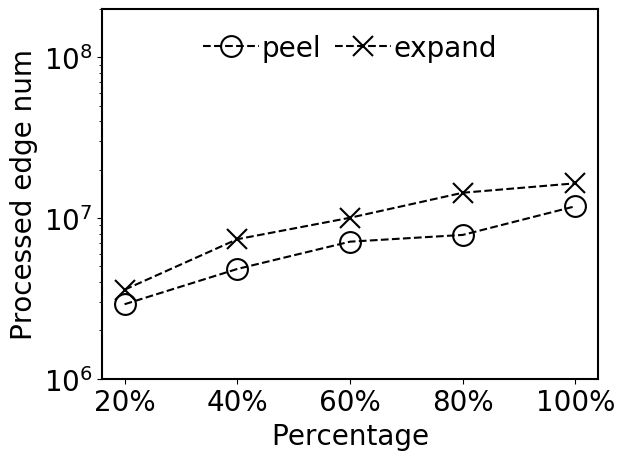

In [50]:
#query scalability edge
# import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.0f'%(20*(temp+1)) + '%'

plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
# delicious-ui

peeling_edge = [2908740.22,4823485.64,7131825.86,7857652.4,11858569.7]
expand_edge = [3583177.06,7388906.4,10049080.1,14383016.68,16467284.66]
# peeling_edge = [1740392.5,3495636.4,4502589.4,3882018,6462453.3]
# expand_edge = [2402103.5,4573443.9,6949653.6,8952369.5,9710138]
plot_line(index_x,peeling_edge,'black','dashed', "o", "peel")
plot_line(index_x,expand_edge,'black','dashed', "x", "expand")
# plot_line(index_x,adv_time,'black','dashed', "s", "adv")
index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(1000000,2*pow(10,8))
plt.ylabel("Processed edge num",fontsize = 20)
plt.xlabel("Percentage",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper center',ncol=2, frameon=False, prop = font2) #去掉图例边框

plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))

plt.savefig(dir+"query_scalability_ui_e.pdf", bbox_inches='tight')

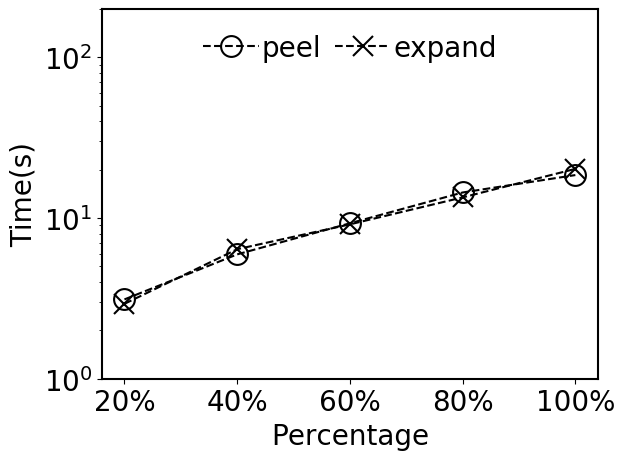

In [93]:
#query scalability time
# import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.0f'%(20*(temp+1)) + '%'

plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
# delicious-ui


peeling_time = [3.117554,5.944582,9.285971,14.435892,18.530698]
expand_time = [2.925863,6.401836,9.142184,13.454593,20.253232]
# peeling_time = [1.511444,3.180949,4.488671,5.140455,7.902685]
# expand_time = [2.097293,4.121352,6.41114,7.137414,10.010397]

plot_line(index_x,peeling_time,'black','dashed', "o", "peel")
plot_line(index_x,expand_time,'black','dashed', "x", "expand")
# plot_line(index_x,adv_time,'black','dashed', "s", "adv")
index_x = ['0.1', '0.3', '0.5', '0.7','0.9']
font2 = {'weight': 'normal', 'size': 20}
plt.yscale('log')
plt.ylim(1,2*pow(10,2))
plt.ylabel("Time(s)",fontsize = 20)
plt.xlabel("Percentage",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper center',ncol=2, frameon=False, prop = font2) 

plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))

plt.savefig(dir+"query_scalability_ui_t.pdf", bbox_inches='tight')

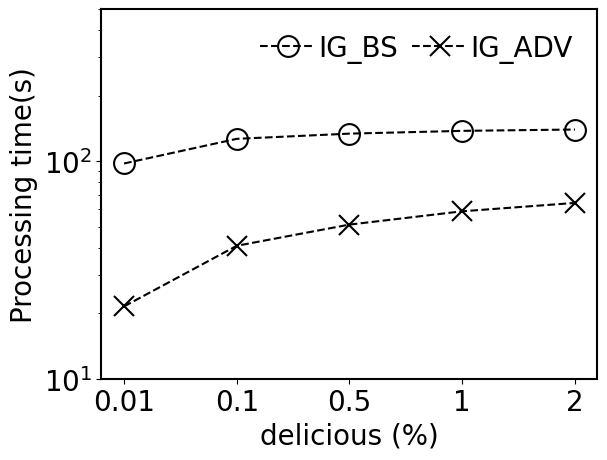

In [101]:
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.01', '0.1', '0.5', '1','2']
font2 = {'weight': 'normal', 'size': 20}

IG_BS = [97.59, 126.68, 133.847, 137.834, 139.816]
IG_ADV = [21.501, 40.843, 51.11, 58.833, 64.288]


# stackoverflow_peeling =[511052.2,236689.9,92571.3,74803.4,58010.8]
# stackoverflow_expand = [356276,208589.7,161437.2,110580,86341.7]

plot_line(index_x,IG_BS,'black','dashed', "o", "IG_BS")
plot_line(index_x,IG_ADV,'black','dashed', "x", "IG_ADV")
plt.yscale('log')

plt.ylim(10,5*pow(10,2))
plt.ylabel("Processing time(s)",fontsize = 20)
plt.xlabel(r"delicious (%)",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir + "delicious.pdf", bbox_inches='tight')

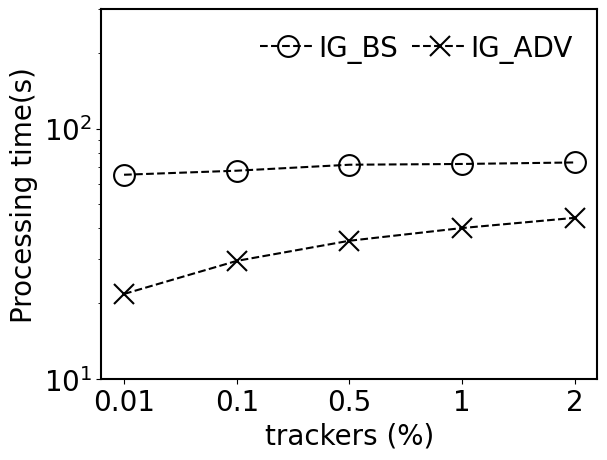

In [100]:
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.01', '0.1', '0.5', '1','2']
font2 = {'weight': 'normal', 'size': 20}

IG_BS = [65.343,67.824,71.656,72.157,73.172]
IG_ADV = [21.813,29.575,35.601,40.02,43.959]


# stackoverflow_peeling =[511052.2,236689.9,92571.3,74803.4,58010.8]
# stackoverflow_expand = [356276,208589.7,161437.2,110580,86341.7]

plot_line(index_x, IG_BS, 'black','dashed', "o", "IG_BS")
plot_line(index_x, IG_ADV, 'black','dashed', "x", "IG_ADV")
plt.yscale('log')

plt.ylim(10,3*pow(10,2))
plt.ylabel("Processing time(s)",fontsize = 20)
plt.xlabel(r"trackers (%)",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir+"trackers.pdf", bbox_inches='tight')

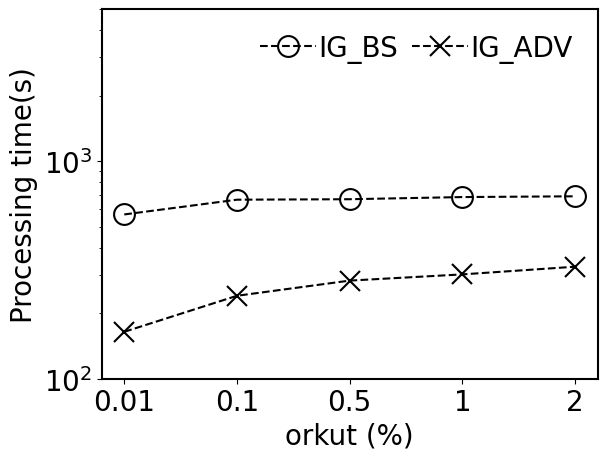

In [97]:
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.01', '0.1', '0.5', '1','2']
font2 = {'weight': 'normal', 'size': 20}

IG_BS = [569.021,665.17,668.544,684.023,689.555]
IG_ADV = [164.301,240.592,282.513,301.725,327.303]


# stackoverflow_peeling =[511052.2,236689.9,92571.3,74803.4,58010.8]
# stackoverflow_expand = [356276,208589.7,161437.2,110580,86341.7]

plot_line(index_x, IG_BS, 'black','dashed', "o", "IG_BS")
plot_line(index_x, IG_ADV, 'black','dashed', "x", "IG_ADV")
plt.yscale('log')

plt.ylim(100,5*pow(10,3))
plt.ylabel("Processing time(s)",fontsize = 20)
plt.xlabel(r"orkut (%)",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir + "orkut.pdf", bbox_inches='tight')

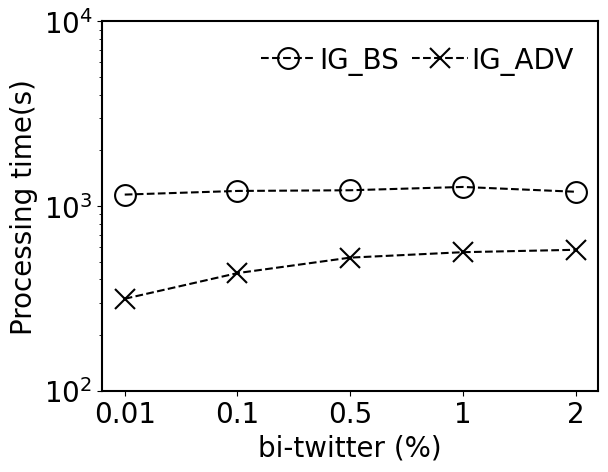

In [96]:
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.01', '0.1', '0.5', '1','2']
font2 = {'weight': 'normal', 'size': 20}

IG_BS = [1151.644,1205.11,1215.512,1266.734,1192.968]
IG_ADV = [314.494,432.969,525.095,561.874,579.002]


# stackoverflow_peeling =[511052.2,236689.9,92571.3,74803.4,58010.8]
# stackoverflow_expand = [356276,208589.7,161437.2,110580,86341.7]

plot_line(index_x, IG_BS, 'black','dashed', "o", "IG_BS")
plot_line(index_x, IG_ADV, 'black','dashed', "x", "IG_ADV")
plt.yscale('log')

plt.ylim(100,1*pow(10,4))
plt.ylabel("Processing time(s)",fontsize = 20)
plt.xlabel(r"bi-twitter (%)",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir + "bi-twitter.pdf", bbox_inches='tight')

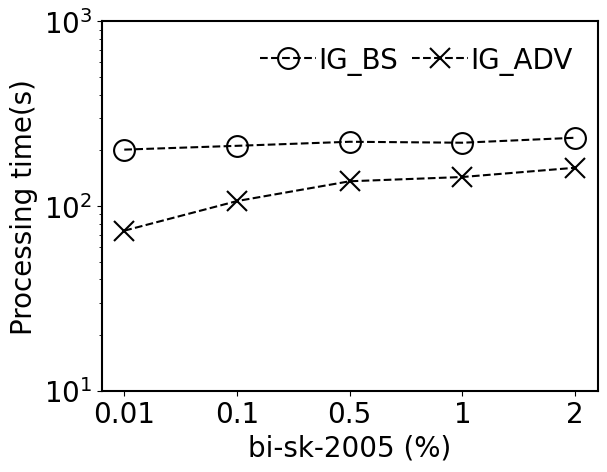

In [94]:
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.01', '0.1', '0.5', '1','2']
font2 = {'weight': 'normal', 'size': 20}

IG_BS = [201.68,211.484,222.425,219.795,233.851]
IG_ADV = [73.438,106.239,135.963,143.384,160.906]


# stackoverflow_peeling =[511052.2,236689.9,92571.3,74803.4,58010.8]
# stackoverflow_expand = [356276,208589.7,161437.2,110580,86341.7]

plot_line(index_x, IG_BS, 'black','dashed', "o", "IG_BS")
plot_line(index_x, IG_ADV, 'black','dashed', "x", "IG_ADV")
plt.yscale('log')

plt.ylim(10,1*pow(10,3))
plt.ylabel("Processing time(s)",fontsize = 20)
plt.xlabel(r"bi-sk-2005 (%)",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir + "bi-sk-2005.pdf", bbox_inches='tight')

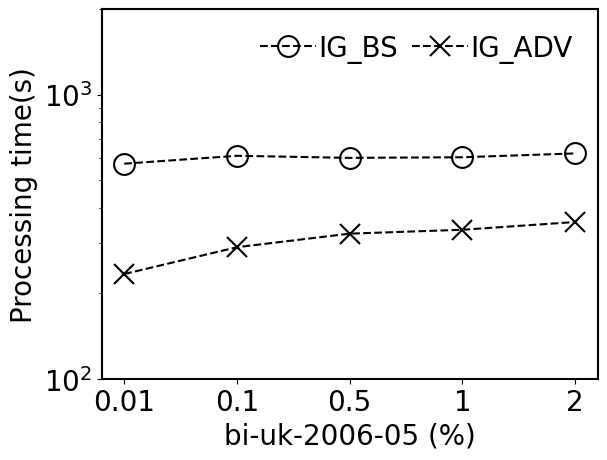

In [87]:
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.01', '0.1', '0.5', '1','2']
font2 = {'weight': 'normal', 'size': 20}

IG_BS = [571.412,609.203,599.067,602.016,620.998]
IG_ADV = [233.624,290.362,324.104,334.459,356.15]


# stackoverflow_peeling =[511052.2,236689.9,92571.3,74803.4,58010.8]
# stackoverflow_expand = [356276,208589.7,161437.2,110580,86341.7]

plot_line(index_x, IG_BS, 'black','dashed', "o", "IG_BS")
plot_line(index_x, IG_ADV, 'black','dashed', "x", "IG_ADV")
plt.yscale('log')

plt.ylim(100,2*pow(10,3))
plt.ylabel("Processing time(s)",fontsize = 20)
plt.xlabel(r"bi-uk-2006-05 (%)",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(loc='upper right',ncol=2, frameon=False, prop = font2) 
plt.savefig(dir + "bi-uk-2006-05.pdf", bbox_inches='tight')

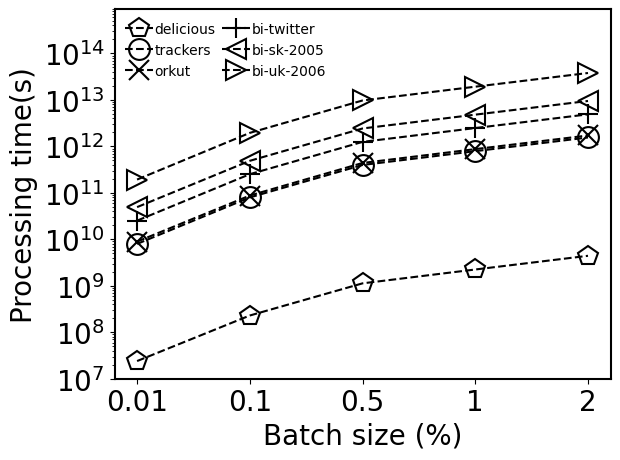

In [103]:
plt.style.use('default')
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams["legend.framealpha"] = 0
plt.rcParams["legend.handletextpad"] = 0.1
plt.rcParams["legend.columnspacing"] = 0.5
index_x = ['0.01', '0.1', '0.5', '1','2']
font2 = {'weight': 'normal', 'size': 20}

deli = [24003243,229322487,1128774902,2242179336,4419529910]
trac = [7965342754,79734093105,398225874432,789440289145,1556022219637]
ork = [8924379389,87520236148,439800640125,873698719539,1717141193908]
bit = [25235023768,252234961372,1250375889472,2482413983775,4895758241701]
bisk = [49329834773,489204651509,2430026018256,4822112916786,9498679768042]
biuk = [193393717757,1953145884070,9732582616154,19271163835940,37966518238769]

# stackoverflow_peeling =[511052.2,236689.9,92571.3,74803.4,58010.8]
# stackoverflow_expand = [356276,208589.7,161437.2,110580,86341.7]

plot_line(index_x, deli, 'black','dashed', "p", "delicious")
plot_line(index_x, trac, 'black','dashed', "o", "trackers")

plot_line(index_x, ork, 'black','dashed', 'x', "orkut")
plot_line(index_x, bit, 'black','dashed', '+', "bi-twitter")

plot_line(index_x, bisk, 'black','dashed', '<', "bi-sk-2005")
plot_line(index_x, biuk, 'black','dashed', '>', "bi-uk-2006")

# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.yscale('log')

plt.ylim(10000000,9*pow(10,14))
plt.ylabel("Processing time(s)",fontsize = 20)
plt.xlabel(r"Batch size (%)",fontsize = 20)
plt.yticks(size = 20)
plt.xticks(size = 20)
plt.legend(ncol=2,bbox_to_anchor=(0.01, 0.98), loc='upper left', borderaxespad=0.) 
plt.savefig(dir + "batch_size.pdf", bbox_inches='tight')